Importing Libraries 

In [97]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

%matplotlib inline

Reading the image

In [98]:
initialimage = io.imread('waterfall.png')

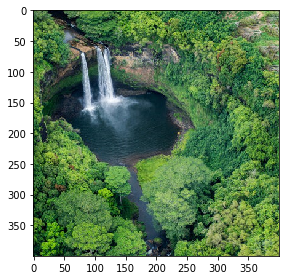

In [99]:
io.imshow(initialimage);

In [100]:
initialimage.shape

(400, 400, 3)

Reshaping into 1D for each RGB channel

In [101]:
rows, cols =initialimage.shape[0], initialimage.shape[1]
image = initalimage.reshape(rows * cols, 3)

In [102]:
print(image.shape)
print(image[:5])

(160000, 3)
[[ 97 142  85]
 [ 96 145  80]
 [ 99 149  78]
 [103 153  84]
 [ 97 143  81]]


In [103]:
distortions=[]
K=range(1,16)

Finding distortion from K = 1 to 15

In [104]:
for i in K:
  kMeans = KMeans(n_clusters = i)
  kMeans.fit(image)
  distortions.append(sum(np.min(cdist(image, kMeans.cluster_centers_, 'euclidean'), axis=1)) / image.shape[0])
  centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
  labels = np.asarray(kMeans.labels_, dtype = np.uint8)
  labels = np.reshape(labels, (rows, cols))
  newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
  for I in range(rows):
      for J in range(cols):
              newImage[I, J, :] = centers[labels[I,J], :]
  io.imsave('newimage'+str(i)+'.png', newImage);
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: newimage1.png is a low contrast image
  if sys.path[0] == '':


#Plotting K value from 1 - 15 with distortion to find Elbow
This helps us determine which k value to choose

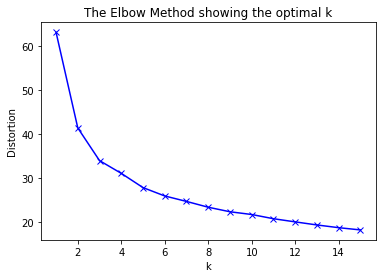

In [105]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the graph there is no clear elbow, any any value from 5-8 can be chosen .

K= 7 from graph

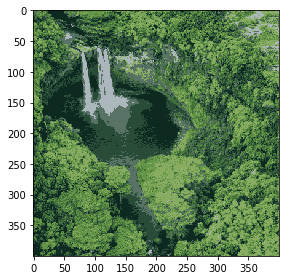

In [111]:
finalimage = io.imread('newimage7.png')
io.imshow(finalimage);



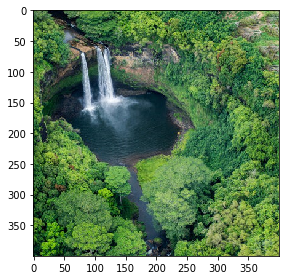

In [112]:
io.imshow(initialimage);